<a href="https://colab.research.google.com/github/liyueling13/Predicting-Banned-Books/blob/main/2)_Banned_Books_Data_Wrangling_and_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup

In [1]:
# this performs line wrapping on output text in Colab

from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

In [2]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/Data Science/Springboard assignments/Capstone Three/Banned Books')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd

In [4]:
banned_df = pd.read_csv('banned_book_descriptions.csv')
banned_df.isna().sum()

author              0
title               0
description       631
published_date    620
dtype: int64

In [5]:
banned_df.shape

(1656, 4)

In [ ]:
banned_df

,author,title,description,published_date
0,"Àbíké-Íyímídé, Faridah",Ace of Spades,"Gossip Girl meets Get Out in Ace of Spades, a ...",2021-06-01
1,"Acevedo, Elizabeth",Clap When You Land,In a novel-in-verse that brims with grief and ...,2020-05-05
2,"Acevedo, Elizabeth",The Poet X,A National Book Award Longlist title! Fans of ...,2019-03-19
3,"Aciman, André",Call Me By Your Name,NaN,NaN
4,"Acito, Marc",How I Paid for College,A deliciously funny romp of a novel about one ...,2005-08-02
...,...,...,...,...
1651,"Zia, Farhana",The Garden of My Imaan,NaN,NaN
1652,"Ziemke, Kristin",Read the World,NaN,NaN
1653,"Zoboi, Ibi",American Street,NaN,NaN
1654,"Zoboi, Ibi",Black Enough,NaN,NaN


In [9]:
banned_df.dropna(inplace=True)
banned_df.shape

(1025, 5)

## Text wrangling

### We'll experiment with one entry at a time

How can we reduce the noise in our descriptions so we can perform topic modelling?

*   Remove stopwords
*   Remove all words but nouns and verbs, remove all words but nouns
*   Perform lemmatization/stemming



### 1. Remove stopwords

In [ ]:
!pip install nltk
import nltk

from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
sample = banned_df['description'].iloc[0]
sample

'Gossip Girl meets Get Out in Ace of Spades, a YA contemporary thriller by debut author Faridah Àbíké-Íyímídé about two students, Devon & Chiamaka, and their struggles against an anonymous bully. All you need to know is . . . I’m here to divide and conquer. Like all great tyrants do. —Aces When two Niveus Private Academy students, Devon Richards and Chiamaka Adebayo, are selected to be part of the elite school’s senior class prefects, it looks like their year is off to an amazing start. After all, not only does it look great on college applications, but it officially puts each of them in the running for valedictorian, too. Shortly after the announcement is made, though, someone who goes by Aces begins using anonymous text messages to reveal secrets about the two of them that turn their lives upside down and threaten every aspect of their carefully planned futures. As Aces shows no sign of stopping, what seemed like a sick prank quickly turns into a dangerous game, with all the cards st

In [ ]:
sample_stop = ' '.join(word for word in sample.split() if word.lower() not in stop_words)

In [ ]:
sample_stop

'Gossip Girl meets Get Ace Spades, YA contemporary thriller debut author Faridah Àbíké-Íyímídé two students, Devon & Chiamaka, struggles anonymous bully. need know . . . I’m divide conquer. Like great tyrants do. —Aces two Niveus Private Academy students, Devon Richards Chiamaka Adebayo, selected part elite school’s senior class prefects, looks like year amazing start. all, look great college applications, officially puts running valedictorian, too. Shortly announcement made, though, someone goes Aces begins using anonymous text messages reveal secrets two turn lives upside threaten every aspect carefully planned futures. Aces shows sign stopping, seemed like sick prank quickly turns dangerous game, cards stacked them. Devon Chiamaka stop Aces things become incredibly deadly? heart-pounding suspense relevant social commentary comes high-octane thriller debut author Faridah Àbíké-Íyímídé.'

Unfortunately there's still a lot of noise. Let's try only keeping nouns and verbs, and only keeping nouns.

### 2. Keep only nouns and verbs/only nouns

In [14]:
nltk.download('punkt')

from nltk import word_tokenize, pos_tag
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
def filter_nouns_and_verbs(text):
    words = word_tokenize(text)  # Tokenize the text into words
    tagged_words = pos_tag(words)  # Perform part-of-speech tagging

    # Keep only nouns (NN, NNS, NNP, NNPS) and verbs (VB, VBD, VBG, VBN, VBP, VBZ)
    filtered_words = [word for word, tag in tagged_words if tag.startswith('NN') or tag.startswith('VB')]

    filtered_text = ' '.join(filtered_words)  # Join the filtered words back into a string
    return filtered_text

In [ ]:
def filter_nouns(text):
    words = word_tokenize(text)  # Tokenize the text into words
    tagged_words = pos_tag(words)  # Perform part-of-speech tagging

    # Keep only nouns (NN, NNS, NNP, NNPS)
    filtered_words = [word for word, tag in tagged_words if tag.startswith('NN')]

    filtered_text = ' '.join(filtered_words)  # Join the filtered words back into a string
    return filtered_text

In [ ]:
filter_nouns_and_verbs(sample)

'Gossip Girl meets Get Ace Spades YA thriller debut author Faridah students Devon Chiamaka struggles need know is ’ divide conquer tyrants do —Aces Niveus Private Academy students Devon Richards Chiamaka Adebayo are selected be part school ’ s class prefects looks year is start does look college applications puts running announcement is made someone goes Aces begins using text messages reveal secrets turn lives upside threaten aspect carefully planned futures Aces shows sign stopping seemed prank turns game cards stacked Devon Chiamaka stop Aces things become suspense commentary comes thriller debut author Faridah Àbíké-Íyímídé'

In [ ]:
filter_nouns(sample)

'Gossip Girl meets Ace Spades YA thriller debut author Faridah students Devon Chiamaka struggles tyrants —Aces Niveus Private Academy students Devon Richards Chiamaka Adebayo part school ’ class prefects year start college applications running announcement someone Aces begins text messages secrets lives aspect carefully futures Aces sign prank game cards Devon Chiamaka Aces things suspense commentary thriller debut author Faridah Àbíké-Íyímídé'

In [ ]:
sample1 = banned_df['description'].iloc[1]
sample1

'In a novel-in-verse that brims with grief and love, National Book Award-winning and New York Times bestselling author Elizabeth Acevedo writes about the devastation of loss, the difficulty of forgiveness, and the bittersweet bonds that shape our lives. Camino Rios lives for the summers when her father visits her in the Dominican Republic. But this time, on the day when his plane is supposed to land, Camino arrives at the airport to see crowds of crying people… In New York City, Yahaira Rios is called to the principal’s office, where her mother is waiting to tell her that her father, her hero, has died in a plane crash. Separated by distance—and Papi’s secrets—the two girls are forced to face a new reality in which their father is dead and their lives are forever altered. And then, when it seems like they’ve lost everything of their father, they learn of each other. Great for summer reading or anytime! Clap When You Land is a Today show pick for “25 children’s books your kids and teens

In [ ]:
filter_nouns_and_verbs(sample1)

'brims grief love National Book Award-winning New York Times bestselling author Elizabeth Acevedo writes devastation loss difficulty forgiveness bittersweet bonds shape lives Camino Rios lives summers father visits Dominican Republic time day plane is supposed land Camino arrives airport see crowds crying people… New York City Yahaira Rios is called ’ s office mother is waiting tell father hero has died plane crash Separated distance—and Papi ’ s girls are forced face reality father is lives are altered seems ’ lost everything father learn Great summer reading anytime Clap Land is Today show pick children s books kids teens won t be put summer do miss Elizabeth Acevedo Poet X Fire High'

In [ ]:
filter_nouns(sample1)

'grief love National Book Award-winning New York Times author Elizabeth Acevedo devastation loss difficulty forgiveness bittersweet bonds lives Camino Rios summers father Dominican Republic time day plane Camino airport crowds people… New York City Yahaira Rios ’ s office mother father hero plane crash distance—and Papi ’ girls reality father lives everything father Great summer reading anytime Clap Today pick children books kids teens t summer Elizabeth Acevedo Poet X Fire High'

In [ ]:
sample2 = banned_df['description'].iloc[2]
sample2

'A National Book Award Longlist title! Fans of Jacqueline Woodson, Meg Medina, and Jason Reynolds will fall hard for this astonishing New York Times-bestselling novel-in-verse by an award-winning slam poet, about an Afro-Latina heroine who tells her story with blazing words and powerful truth. Xiomara Batista feels unheard and unable to hide in her Harlem neighborhood. Ever since her body grew into curves, she has learned to let her fists and her fierceness do the talking. But Xiomara has plenty she wants to say, and she pours all her frustration and passion onto the pages of a leather notebook, reciting the words to herself like prayers—especially after she catches feelings for a boy in her bio class named Aman, who her family can never know about. With Mami’s determination to force her daughter to obey the laws of the church, Xiomara understands that her thoughts are best kept to herself. So when she is invited to join her school’s slam poetry club, she doesn’t know how she could eve

In [ ]:
filter_nouns_and_verbs(sample2)

'National Book Award Longlist title Fans Jacqueline Woodson Meg Medina Jason Reynolds fall New York slam poet Afro-Latina heroine tells story blazing words truth Batista feels hide Harlem neighborhood body grew curves has learned let fists fierceness do talking Xiomara has plenty wants say pours frustration passion pages leather notebook reciting words herself catches feelings boy class named Aman family know Mami ’ s determination force daughter obey laws church Xiomara understands thoughts are kept is invited join school ’ s slam poetry club doesn t know attend mami finding ’ stop thinking performing poems face world want hear Xiomara refuses be Crackles energy snaps authenticity voice. ” —Justina Ireland author Dread Nation “ debut. ” —Jason Reynolds author National Book Award Finalist Ghost “ Acevedo has amplified voices girls barrio are parts goddess saint hero. ” —Ibi Zoboi author American Street'

In [ ]:
filter_nouns(sample2)

'National Book Award Longlist title Fans Jacqueline Woodson Meg Medina Jason Reynolds New York slam poet Afro-Latina heroine story blazing words truth Batista feels Harlem neighborhood body curves fists fierceness Xiomara plenty frustration passion pages leather notebook words feelings boy class Aman family Mami ’ determination daughter laws church Xiomara thoughts school ’ s slam poetry club t mami poems face world Xiomara Crackles energy snaps authenticity voice. ” —Justina Ireland author Dread Nation “ debut. ” —Jason Reynolds author National Book Award Finalist Ghost “ Acevedo voices girls barrio parts goddess saint hero. ” —Ibi Zoboi author American Street'

Seems like removing everything except nouns retains the basic integrity of the description.

### Stemming and Lemmatization

Stemming is quicker and less computationally expensive, but lemmatization is more accurate.

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# nltk.download('punkt')

In [ ]:
%%time
sample_tokenized = word_tokenize(sample_nopunct)
stemmer = PorterStemmer()
sample_stemmed = [stemmer.stem(word) for word in sample_tokenized]
sample_stemmed

CPU times: user 6.33 ms, sys: 4 µs, total: 6.34 ms
Wall time: 19 ms


['gossip',
 'girl',
 'meet',
 'get',
 'ace',
 'spade',
 'ya',
 'contemporari',
 'thriller',
 'debut',
 'author',
 'faridah',
 'àbíkéíyímídé',
 'two',
 'student',
 'devon',
 'chiamaka',
 'struggl',
 'anonym',
 'bulli',
 'need',
 'know',
 'im',
 'divid',
 'conquer',
 'like',
 'great',
 'tyrant',
 'do',
 'ace',
 'two',
 'niveu',
 'privat',
 'academi',
 'student',
 'devon',
 'richard',
 'chiamaka',
 'adebayo',
 'select',
 'part',
 'elit',
 'school',
 'senior',
 'class',
 'prefect',
 'look',
 'like',
 'year',
 'amaz',
 'start',
 'all',
 'look',
 'great',
 'colleg',
 'applic',
 'offici',
 'put',
 'run',
 'valedictorian',
 'too',
 'shortli',
 'announc',
 'made',
 'though',
 'someon',
 'goe',
 'ace',
 'begin',
 'use',
 'anonym',
 'text',
 'messag',
 'reveal',
 'secret',
 'two',
 'turn',
 'live',
 'upsid',
 'threaten',
 'everi',
 'aspect',
 'care',
 'plan',
 'futur',
 'ace',
 'show',
 'sign',
 'stop',
 'seem',
 'like',
 'sick',
 'prank',
 'quickli',
 'turn',
 'danger',
 'game',
 'card',
 'stack

In [16]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# nltk.download('punkt')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
%%time
sample_tokenized = word_tokenize(sample_nopunct)
# lemmatizer = WordNetLemmatizer()
sample_lemma = [lemmatizer.lemmatize(word) for word in sample_tokenized]
sample_lemma

CPU times: user 3.38 ms, sys: 0 ns, total: 3.38 ms
Wall time: 6.23 ms


['Gossip',
 'Girl',
 'meet',
 'Get',
 'Ace',
 'Spades',
 'YA',
 'contemporary',
 'thriller',
 'debut',
 'author',
 'Faridah',
 'ÀbíkéÍyímídé',
 'two',
 'student',
 'Devon',
 'Chiamaka',
 'struggle',
 'anonymous',
 'bully',
 'need',
 'know',
 'Im',
 'divide',
 'conquer',
 'Like',
 'great',
 'tyrant',
 'do',
 'Aces',
 'two',
 'Niveus',
 'Private',
 'Academy',
 'student',
 'Devon',
 'Richards',
 'Chiamaka',
 'Adebayo',
 'selected',
 'part',
 'elite',
 'school',
 'senior',
 'class',
 'prefect',
 'look',
 'like',
 'year',
 'amazing',
 'start',
 'all',
 'look',
 'great',
 'college',
 'application',
 'officially',
 'put',
 'running',
 'valedictorian',
 'too',
 'Shortly',
 'announcement',
 'made',
 'though',
 'someone',
 'go',
 'Aces',
 'begin',
 'using',
 'anonymous',
 'text',
 'message',
 'reveal',
 'secret',
 'two',
 'turn',
 'life',
 'upside',
 'threaten',
 'every',
 'aspect',
 'carefully',
 'planned',
 'future',
 'Aces',
 'show',
 'sign',
 'stopping',
 'seemed',
 'like',
 'sick',
 'prank'

### Iterate over the dataframe
Given what we found, Let's perform the following:

*   Lowercase everything
*   Remove stopwords
*   Remove all words except nouns and adjectives
*   Perform lemmatization (preserves real words)
*   Remove numbers and punctuation
*   Remove random one letter words

In [10]:
banned_df['description_cleaned'] = banned_df['description'].apply(lambda x: x.lower() if isinstance(x, str) else x)
banned_df

,author,title,description,published_date,description_cleaned
0,"Àbíké-Íyímídé, Faridah",Ace of Spades,"Gossip Girl meets Get Out in Ace of Spades, a ...",2021-06-01,"gossip girl meets get out in ace of spades, a ..."
1,"Acevedo, Elizabeth",Clap When You Land,In a novel-in-verse that brims with grief and ...,2020-05-05,in a novel-in-verse that brims with grief and ...
2,"Acevedo, Elizabeth",The Poet X,A National Book Award Longlist title! Fans of ...,2019-03-19,a national book award longlist title! fans of ...
4,"Acito, Marc",How I Paid for College,A deliciously funny romp of a novel about one ...,2005-08-02,a deliciously funny romp of a novel about one ...
6,"Addasi, Maha",Time to Pray,A visit with Grandmother in the Middle East is...,2021-11-16,a visit with grandmother in the middle east is...
...,...,...,...,...,...
1644,Yin,Coolies,Shek marvels at the new world as he and his br...,2003-05-26,shek marvels at the new world as he and his br...
1645,"Yolen, Jane",Encounter,A Taino Indian boy on the island of San Salvad...,1996,a taino indian boy on the island of san salvad...
1648,"Yousafzai, Malala",Malala's Magic Pencil,Nobel Peace Prize winner and New York Times be...,2017-10-17,nobel peace prize winner and new york times be...
1649,"Zabarsky, Jessi",Witchlight,Love -- loss -- witches -- this YA fantasy gra...,2020-04-14,love -- loss -- witches -- this ya fantasy gra...


In [11]:
banned_df['description_cleaned'] = banned_df['description_cleaned'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

In [12]:
def filter_nouns_and_adj(text):
    words = word_tokenize(text)  # Tokenize the text into words
    tagged_words = pos_tag(words)  # Perform part-of-speech tagging

    # Keep only nouns (NN, NNS, NNP, NNPS)
    filtered_words = [word for word, tag in tagged_words if tag.startswith('NN') or tag.startswith('JJ')]

    filtered_text = ' '.join(filtered_words)  # Join the filtered words back into a string
    return filtered_text

In [15]:
%%time
banned_df['description_cleaned'] = banned_df['description_cleaned'].apply(lambda x: filter_nouns_and_adj(x) if isinstance(x, str) else x)
banned_df

CPU times: user 7.33 s, sys: 34 ms, total: 7.36 s
Wall time: 7.39 s


,author,title,description,published_date,description_cleaned
0,"Àbíké-Íyímídé, Faridah",Ace of Spades,"Gossip Girl meets Get Out in Ace of Spades, a ...",2021-06-01,gossip girl meets ace spades ya contemporary t...
1,"Acevedo, Elizabeth",Clap When You Land,In a novel-in-verse that brims with grief and ...,2020-05-05,novel-in-verse brims grief love national book ...
2,"Acevedo, Elizabeth",The Poet X,A National Book Award Longlist title! Fans of ...,2019-03-19,national book award longlist title fans jacque...
4,"Acito, Marc",How I Paid for College,A deliciously funny romp of a novel about one ...,2005-08-02,funny romp theatrical confused new jersey teen...
6,"Addasi, Maha",Time to Pray,A visit with Grandmother in the Middle East is...,2021-11-16,visit grandmother middle east special yasmin t...
...,...,...,...,...,...
1644,Yin,Coolies,Shek marvels at the new world as he and his br...,2003-05-26,shek marvels new world brother little wong arr...
1645,"Yolen, Jane",Encounter,A Taino Indian boy on the island of San Salvad...,1996,taino indian boy island san salvador recounts ...
1648,"Yousafzai, Malala",Malala's Magic Pencil,Nobel Peace Prize winner and New York Times be...,2017-10-17,nobel peace winner new york times author malal...
1649,"Zabarsky, Jessi",Witchlight,Love -- loss -- witches -- this YA fantasy gra...,2020-04-14,love loss witches fantasy graphic novel though...


In [19]:
%%time
banned_df['description_cleaned'] = banned_df['description_cleaned'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]) if isinstance(x, str) else x)
banned_df

CPU times: user 1.94 s, sys: 58.1 ms, total: 2 s
Wall time: 2.03 s


,author,title,description,published_date,description_cleaned
0,"Àbíké-Íyímídé, Faridah",Ace of Spades,"Gossip Girl meets Get Out in Ace of Spades, a ...",2021-06-01,gossip girl meet ace spade ya contemporary thr...
1,"Acevedo, Elizabeth",Clap When You Land,In a novel-in-verse that brims with grief and ...,2020-05-05,novel-in-verse brim grief love national book a...
2,"Acevedo, Elizabeth",The Poet X,A National Book Award Longlist title! Fans of ...,2019-03-19,national book award longlist title fan jacquel...
4,"Acito, Marc",How I Paid for College,A deliciously funny romp of a novel about one ...,2005-08-02,funny romp theatrical confused new jersey teen...
6,"Addasi, Maha",Time to Pray,A visit with Grandmother in the Middle East is...,2021-11-16,visit grandmother middle east special yasmin t...
...,...,...,...,...,...
1644,Yin,Coolies,Shek marvels at the new world as he and his br...,2003-05-26,shek marvel new world brother little wong arri...
1645,"Yolen, Jane",Encounter,A Taino Indian boy on the island of San Salvad...,1996,taino indian boy island san salvador recount c...
1648,"Yousafzai, Malala",Malala's Magic Pencil,Nobel Peace Prize winner and New York Times be...,2017-10-17,nobel peace winner new york time author malala...
1649,"Zabarsky, Jessi",Witchlight,Love -- loss -- witches -- this YA fantasy gra...,2020-04-14,love loss witch fantasy graphic novel thoughtf...


In [20]:
import re
banned_df['description_cleaned'] = banned_df['description_cleaned'].apply(lambda x: re.sub(r'[^\w\s]', ' ', x) if isinstance(x, str) else x)
banned_df

,author,title,description,published_date,description_cleaned
0,"Àbíké-Íyímídé, Faridah",Ace of Spades,"Gossip Girl meets Get Out in Ace of Spades, a ...",2021-06-01,gossip girl meet ace spade ya contemporary thr...
1,"Acevedo, Elizabeth",Clap When You Land,In a novel-in-verse that brims with grief and ...,2020-05-05,novel in verse brim grief love national book a...
2,"Acevedo, Elizabeth",The Poet X,A National Book Award Longlist title! Fans of ...,2019-03-19,national book award longlist title fan jacquel...
4,"Acito, Marc",How I Paid for College,A deliciously funny romp of a novel about one ...,2005-08-02,funny romp theatrical confused new jersey teen...
6,"Addasi, Maha",Time to Pray,A visit with Grandmother in the Middle East is...,2021-11-16,visit grandmother middle east special yasmin t...
...,...,...,...,...,...
1644,Yin,Coolies,Shek marvels at the new world as he and his br...,2003-05-26,shek marvel new world brother little wong arri...
1645,"Yolen, Jane",Encounter,A Taino Indian boy on the island of San Salvad...,1996,taino indian boy island san salvador recount c...
1648,"Yousafzai, Malala",Malala's Magic Pencil,Nobel Peace Prize winner and New York Times be...,2017-10-17,nobel peace winner new york time author malala...
1649,"Zabarsky, Jessi",Witchlight,Love -- loss -- witches -- this YA fantasy gra...,2020-04-14,love loss witch fantasy graphic novel thoughtf...


In [21]:
def remove_one_letter(text):
  words = text.split()
  filtered_words = [word for word in words if len(word)>1]
  return ' '.join(filtered_words)

banned_df['description_cleaned'] = banned_df['description_cleaned'].apply(remove_one_letter)

In [22]:
# one more thing, let's rearrange the author names

def rearrange_names(name):
    try:
      if ',' in name:
          last_name, first_name = name.split(', ')
          return f'{first_name} {last_name}'
      else:
          return name
    except:
      pass

banned_df['author'] = banned_df['author'].apply(rearrange_names)
banned_df

,author,title,description,published_date,description_cleaned
0,Faridah Àbíké-Íyímídé,Ace of Spades,"Gossip Girl meets Get Out in Ace of Spades, a ...",2021-06-01,gossip girl meet ace spade ya contemporary thr...
1,Elizabeth Acevedo,Clap When You Land,In a novel-in-verse that brims with grief and ...,2020-05-05,novel in verse brim grief love national book a...
2,Elizabeth Acevedo,The Poet X,A National Book Award Longlist title! Fans of ...,2019-03-19,national book award longlist title fan jacquel...
4,Marc Acito,How I Paid for College,A deliciously funny romp of a novel about one ...,2005-08-02,funny romp theatrical confused new jersey teen...
6,Maha Addasi,Time to Pray,A visit with Grandmother in the Middle East is...,2021-11-16,visit grandmother middle east special yasmin t...
...,...,...,...,...,...
1644,Yin,Coolies,Shek marvels at the new world as he and his br...,2003-05-26,shek marvel new world brother little wong arri...
1645,Jane Yolen,Encounter,A Taino Indian boy on the island of San Salvad...,1996,taino indian boy island san salvador recount c...
1648,Malala Yousafzai,Malala's Magic Pencil,Nobel Peace Prize winner and New York Times be...,2017-10-17,nobel peace winner new york time author malala...
1649,Jessi Zabarsky,Witchlight,Love -- loss -- witches -- this YA fantasy gra...,2020-04-14,love loss witch fantasy graphic novel thoughtf...


### EDA/Visualization

*   Popular banned authors
*   Year of publication
*   Description length (before text cleaning)
*   Most common words (after text cleaning)



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
banned_df['author'].value_counts()

Woodson, Jacqueline        8
Seba, Jaime A.             7
Newman, Lesléa             6
Hutchinson, Shaun David    6
Levithan, David            6
                          ..
Haney, Johannah            1
Hansberry, Lorraine        1
Harbach, Chad              1
Harmon, Michael            1
Zunon, Elizabeth           1
Name: author, Length: 832, dtype: int64

In [ ]:
authors = banned_df['author'].value_counts()
pop_authors = authors[authors>2]
banned_popauthors = banned_df[banned_df['author'].isin(pop_authors.index)]
banned_popauthors

,author,title,description,published_date,description_cleaned,year
59,"Arnold, Elana K.",Damsel,*A 2019 Michael L. Printz Award Honor Book* A ...,2018-10-02,michael book dark tale k arnold author book g...,2018
60,"Arnold, Elana K.",Infandous,"Seventeen-year-old Sephora, a surfer and artis...",2017-04,sephora surfer artist fairy tale mythology bea...,2017
61,"Arnold, Elana K.",Red Hood,"A dark, engrossing, blood-drenched tale of the...",2020-02-25,dark tale threat power and girl journey revi...,2020
62,"Arnold, Elana K.",What Girls Are Made Of,Sixteen-year-old Nina isn't made of sugar and ...,2020-01-28,nina sugar spice everything nice blood desire ...,2020
67,"Atwood, Margaret",The Handmaid's Tale,An instant classic and eerily prescient cultur...,2011-09-06,classic phenomenon patron saint fiction york...,2011
...,...,...,...,...,...,...
1627,"Woodson, Jacqueline",Each Kindness,WINNER OF A CORETTA SCOTT KING HONOR AND THE J...,2012-10-23,winner coretta scott honor jane award kindness...,2012
1629,"Woodson, Jacqueline",Red at the Bone,A NEW YORK TIMES BESTSELLER A NEW YORK TIMES N...,2020-09-01,york time york time book year novel legend x ...,2020
1630,"Woodson, Jacqueline",The Day You Begin,A #1 NEW YORK TIMES BESTSELLER! Featured in it...,2018-08-28,york time episode show bookmark voice book awa...,2018
1631,"Woodson, Jacqueline",The Dear One,An intriguing look at teen pregnancy from a th...,2010-11-11,look pregnancy newbery honor author feni mothe...,2010


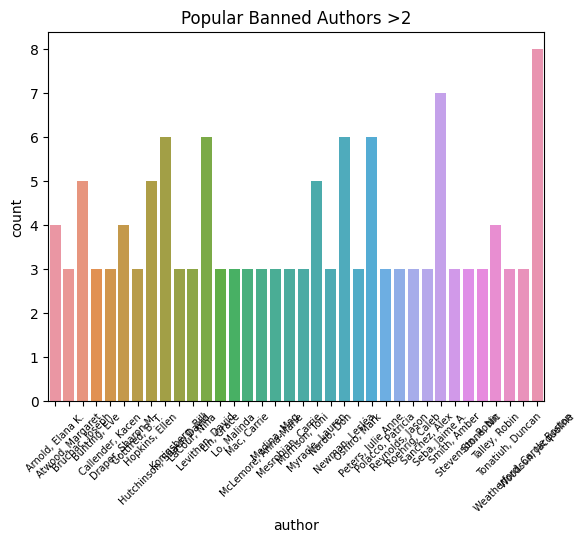

In [ ]:
sns.countplot(data=banned_popauthors, x='author')
plt.xticks(fontsize=7, rotation=45)
plt.title('Popular Banned Authors >2')
plt.show()

In [ ]:
banned_df['year'] = pd.to_datetime(banned_df['published_date']).dt.year
banned_df

,author,title,description,published_date,description_cleaned,year
0,"Àbíké-Íyímídé, Faridah",Ace of Spades,"Gossip Girl meets Get Out in Ace of Spades, a ...",2021-06-01,gossip girl meet ace spade thriller debut auth...,2021
1,"Acevedo, Elizabeth",Clap When You Land,In a novel-in-verse that brims with grief and ...,2020-05-05,grief love book award winning york time author...,2020
2,"Acevedo, Elizabeth",The Poet X,A National Book Award Longlist title! Fans of ...,2019-03-19,book award longlist title fan jacqueline woods...,2019
4,"Acito, Marc",How I Paid for College,A deliciously funny romp of a novel about one ...,2005-08-02,romp novel jersey teenager quest school tuit...,2005
6,"Addasi, Maha",Time to Pray,A visit with Grandmother in the Middle East is...,2021-11-16,visit grandmother east yasmin time picture boo...,2021
...,...,...,...,...,...,...
1644,Yin,Coolies,Shek marvels at the new world as he and his br...,2003-05-26,shek marvel world brother wong california hund...,2003
1645,"Yolen, Jane",Encounter,A Taino Indian boy on the island of San Salvad...,1996,taino boy island salvador landing columbus men,1996
1648,"Yousafzai, Malala",Malala's Magic Pencil,Nobel Peace Prize winner and New York Times be...,2017-10-17,peace prize winner york time author malala you...,2017
1649,"Zabarsky, Jessi",Witchlight,Love -- loss -- witches -- this YA fantasy gra...,2020-04-14,love loss witch novel story story artwork lele...,2020


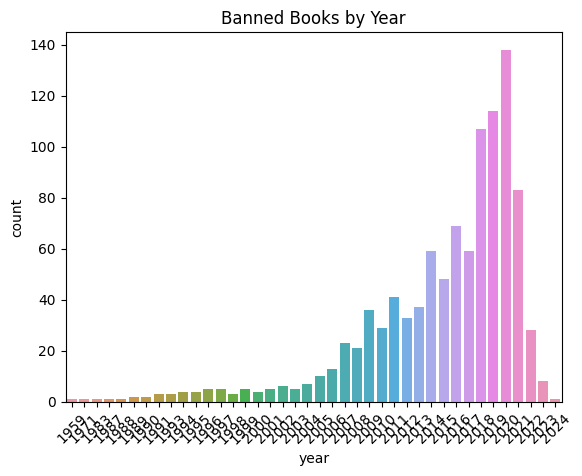

In [ ]:
sns.countplot(data=banned_df, x='year')
plt.xticks(rotation=45)
plt.title('Banned Books by Year')
plt.show()

In [ ]:
# how can there be a book banned in 2024 when it is still 2023?!
banned_df[banned_df['year']==2024]

# this seems to be an error, it was published in 2015
# hopefully there are no other errors like this

,author,title,description,published_date,description_cleaned,year
654,"Hudson Jr., David L.",Teen Legal Rights,Teen legal rights are perpetually changing in ...,2024-06-13,right society classroom work family community ...,2024


In [ ]:
banned_df['word_count'] = banned_df['description'].apply(lambda x: len(str(x).split()))
banned_df

,author,title,description,published_date,description_cleaned,year,word_count
0,"Àbíké-Íyímídé, Faridah",Ace of Spades,"Gossip Girl meets Get Out in Ace of Spades, a ...",2021-06-01,gossip girl meet ace spade thriller debut auth...,2021,203
1,"Acevedo, Elizabeth",Clap When You Land,In a novel-in-verse that brims with grief and ...,2020-05-05,grief love book award winning york time author...,2020,196
2,"Acevedo, Elizabeth",The Poet X,A National Book Award Longlist title! Fans of ...,2019-03-19,book award longlist title fan jacqueline woods...,2019,258
4,"Acito, Marc",How I Paid for College,A deliciously funny romp of a novel about one ...,2005-08-02,romp novel jersey teenager quest school tuit...,2005,263
6,"Addasi, Maha",Time to Pray,A visit with Grandmother in the Middle East is...,2021-11-16,visit grandmother east yasmin time picture boo...,2021,186
...,...,...,...,...,...,...,...
1644,Yin,Coolies,Shek marvels at the new world as he and his br...,2003-05-26,shek marvel world brother wong california hund...,2003,92
1645,"Yolen, Jane",Encounter,A Taino Indian boy on the island of San Salvad...,1996,taino boy island salvador landing columbus men,1996,20
1648,"Yousafzai, Malala",Malala's Magic Pencil,Nobel Peace Prize winner and New York Times be...,2017-10-17,peace prize winner york time author malala you...,2017,195
1649,"Zabarsky, Jessi",Witchlight,Love -- loss -- witches -- this YA fantasy gra...,2020-04-14,love loss witch novel story story artwork lele...,2020,118


In [ ]:
banned_df['word_count'].describe()

count    1025.000000
mean      145.867317
std        93.061094
min         5.000000
25%        69.000000
50%       142.000000
75%       204.000000
max       677.000000
Name: word_count, dtype: float64

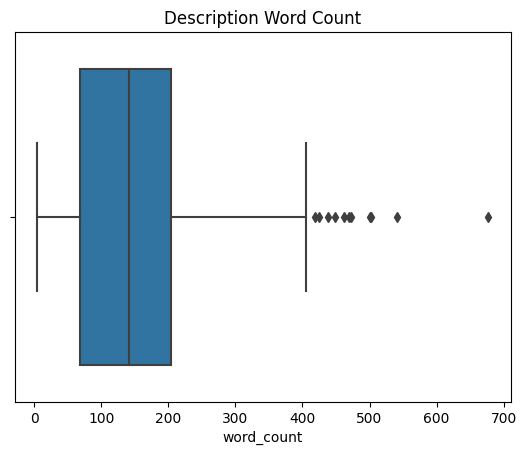

In [ ]:
sns.boxplot(data=banned_df, x='word_count')
plt.title('Description Word Count')
plt.show()

In [ ]:
from collections import Counter
word_counts = Counter()

for text in banned_df['description_cleaned']:
  tokens = word_tokenize(text)
  word_counts.update(tokens)

word_counts.most_common(50)

[('book', 834),
 ('story', 537),
 ('life', 530),
 ('time', 513),
 ('school', 453),
 ('author', 438),
 ('family', 432),
 ('girl', 405),
 ('friend', 381),
 ('love', 350),
 ('world', 314),
 ('york', 294),
 ('year', 287),
 ('boy', 277),
 ('people', 272),
 ('novel', 271),
 ('child', 270),
 ('way', 261),
 ('reader', 211),
 ('day', 194),
 ('thing', 179),
 ('mother', 179),
 ('father', 163),
 ('award', 158),
 ('review', 156),
 ('identity', 154),
 ('home', 151),
 ('parent', 145),
 ('gender', 144),
 ('woman', 143),
 ('everything', 132),
 ('friendship', 121),
 ('winner', 121),
 ('history', 121),
 ('community', 115),
 ('debut', 114),
 ('kid', 114),
 ('teen', 110),
 ('picture', 109),
 ('everyone', 109),
 ('student', 107),
 ('heart', 104),
 ('something', 101),
 ('truth', 100),
 ('relationship', 100),
 ('fan', 99),
 ('place', 98),
 ('sister', 94),
 ('secret', 90),
 ('word', 90)]

### Save cleaned dataframe

In [24]:
banned_cleaned = banned_df.drop(columns=['description', 'published_date', 'year', 'word_count'])
banned_cleaned

,author,title,description_cleaned
0,Faridah Àbíké-Íyímídé,Ace of Spades,gossip girl meet ace spade ya contemporary thr...
1,Elizabeth Acevedo,Clap When You Land,novel in verse brim grief love national book a...
2,Elizabeth Acevedo,The Poet X,national book award longlist title fan jacquel...
4,Marc Acito,How I Paid for College,funny romp theatrical confused new jersey teen...
6,Maha Addasi,Time to Pray,visit grandmother middle east special yasmin t...
...,...,...,...
1644,Yin,Coolies,shek marvel new world brother little wong arri...
1645,Jane Yolen,Encounter,taino indian boy island san salvador recount c...
1648,Malala Yousafzai,Malala's Magic Pencil,nobel peace winner new york time author malala...
1649,Jessi Zabarsky,Witchlight,love loss witch fantasy graphic novel thoughtf...


In [25]:
banned_cleaned.to_csv('banned_cleaned.csv', index=False)